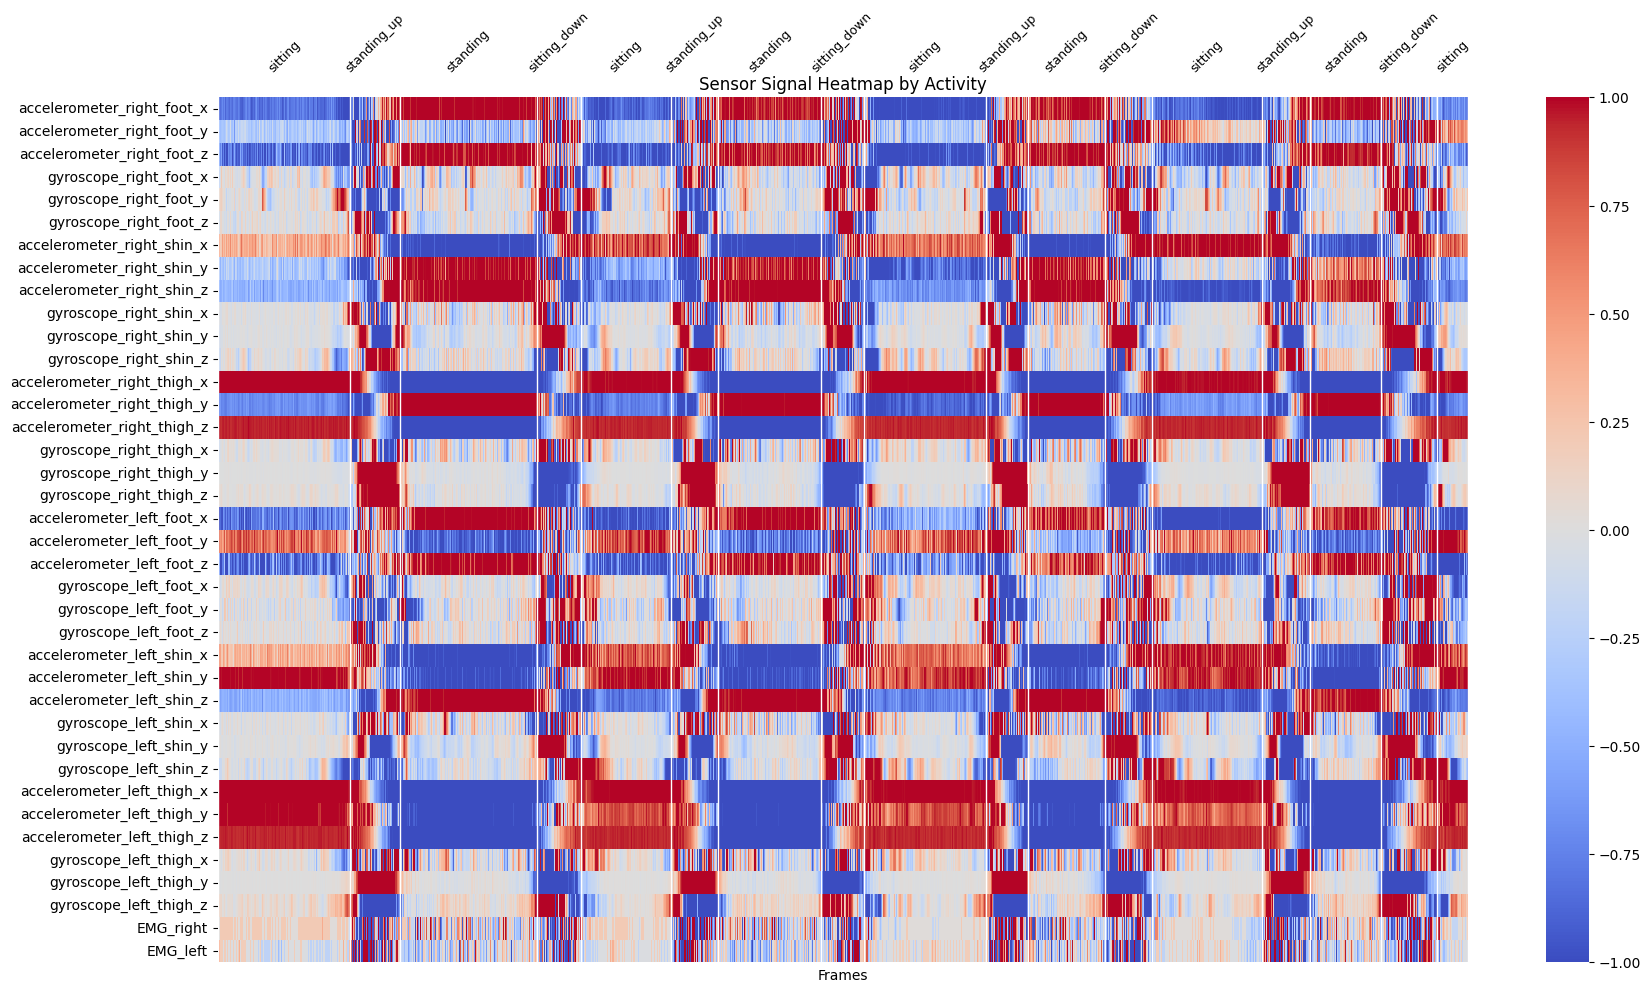

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("H:\Chrome_downloads\HuGaDB_v2_various_01_00.csv")  # Replace with your actual filename

# Drop non-sensor columns
sensor_cols = [col for col in df.columns if col not in ['Unnamed: 0', 'activity']]
sensor_data = df[sensor_cols]

# Normalize sensor data (column-wise z-score)
normalized_data = (sensor_data - sensor_data.mean()) / sensor_data.std()
heatmap_data = normalized_data.T  # Transpose for heatmap: sensors x time

# Identify activity transitions
activities = df['activity'].values
boundaries = [0]
labels = []

for i in range(1, len(activities)):
    if activities[i] != activities[i - 1]:
        boundaries.append(i)
        labels.append(activities[i - 1])
boundaries.append(len(activities))
labels.append(activities[-1])

# Plot the heatmap
plt.figure(figsize=(18, 10))
sns.heatmap(heatmap_data, cmap='coolwarm', cbar=True, vmin=-1, vmax=1)

# Draw vertical lines for activity boundaries
for b in boundaries:
    plt.axvline(x=b, color='white', linewidth=1)

# Add activity labels on top
midpoints = [(boundaries[i] + boundaries[i+1]) // 2 for i in range(len(boundaries)-1)]
for i, label in enumerate(labels):
    plt.text(midpoints[i], -1, label, ha='center', va='bottom', fontsize=9, rotation=45)

# Axis formatting
plt.yticks(np.arange(len(sensor_cols)) + 0.5, sensor_cols, rotation=0)
plt.xticks([])
plt.xlabel("Frames")
plt.title("Sensor Signal Heatmap by Activity")
plt.tight_layout()
plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_7380\1652443431.py:30: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


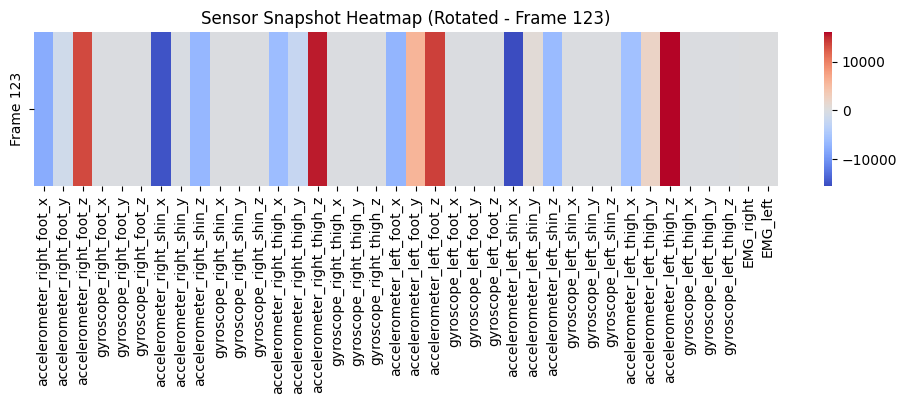

In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("H:\Chrome_downloads\HuGaDB_v2_various_01_00.csv")  # Replace with your actual filename

# Select sensor columns only
sensor_cols = [col for col in df.columns if col not in ['Unnamed: 0', 'activity']]
sensor_data = df[sensor_cols]

# --- Choose a specific frame ---
frame_number = 123  # Change this to your desired row index

# Safety check
if frame_number >= len(sensor_data):
    raise IndexError("Frame number exceeds dataset length.")

# Transpose the row to plot horizontally
frame_row = sensor_data.iloc[frame_number].values.reshape(1, -1)

# Plot rotated heatmap
plt.figure(figsize=(12, 2))
sns.heatmap(frame_row, cmap='coolwarm', xticklabels=sensor_cols, yticklabels=[f"Frame {frame_number}"], cbar=True)

plt.xticks(rotation=90)
plt.ylabel("")
plt.title(f"Sensor Snapshot Heatmap (Rotated - Frame {frame_number})")
plt.tight_layout()
plt.show()


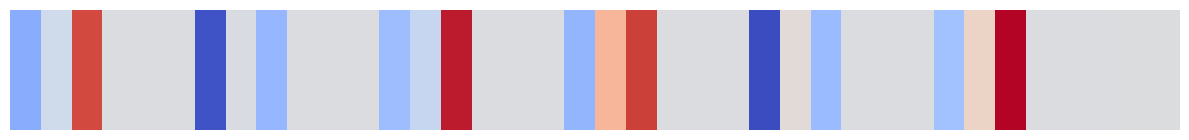

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("H:\Chrome_downloads\HuGaDB_v2_various_01_00.csv")  # Replace with your actual filename

# Extract sensor columns
sensor_cols = [col for col in df.columns if col not in ['Unnamed: 0', 'activity']]
sensor_data = df[sensor_cols]

# Select frame
frame_number = 123  # Change as needed
frame_row = sensor_data.iloc[frame_number].values.reshape(1, -1)

# Plot heatmap with no labels
plt.figure(figsize=(12, 1.5))
sns.heatmap(frame_row, cmap='coolwarm', xticklabels=False, yticklabels=False, cbar=False)

plt.axis('off')  # Remove axes completely
plt.tight_layout()
plt.show()


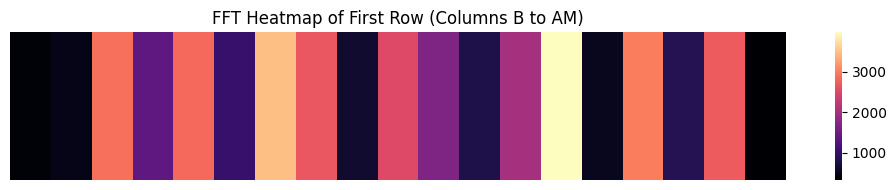

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.fft import fft, fftfreq

# Load dataset
df = pd.read_csv(r"H:\Chrome_downloads\HuGaDB_v2_various_01_00.csv")

# Extract values from columns B to AM for the first row
# These columns are positions 1 to 38 (Python is 0-indexed)
row_data = df.iloc[0, 1:39].values.astype(float)

# Compute FFT
n = len(row_data)
fs = 50  # Assumed sampling rate
yf = fft(row_data)
xf = fftfreq(n, 1 / fs)[:n // 2]
magnitude = 2.0 / n * np.abs(yf[:n // 2])

# Plot FFT as a heatmap
plt.figure(figsize=(10, 2))
sns.heatmap(magnitude.reshape(1, -1), cmap='magma', cbar=True, xticklabels=False, yticklabels=False)
plt.axis('off')
plt.title("FFT Heatmap of First Row (Columns B to AM)")
plt.tight_layout()
plt.show()


Available activities: ['sitting' 'standing_up' 'standing' 'sitting_down']
Available sensors: ['accelerometer_right_foot_x', 'accelerometer_right_foot_y', 'accelerometer_right_foot_z', 'gyroscope_right_foot_x', 'gyroscope_right_foot_y', 'gyroscope_right_foot_z', 'accelerometer_right_shin_x', 'accelerometer_right_shin_y', 'accelerometer_right_shin_z', 'gyroscope_right_shin_x', 'gyroscope_right_shin_y', 'gyroscope_right_shin_z', 'accelerometer_right_thigh_x', 'accelerometer_right_thigh_y', 'accelerometer_right_thigh_z', 'gyroscope_right_thigh_x', 'gyroscope_right_thigh_y', 'gyroscope_right_thigh_z', 'accelerometer_left_foot_x', 'accelerometer_left_foot_y', 'accelerometer_left_foot_z', 'gyroscope_left_foot_x', 'gyroscope_left_foot_y', 'gyroscope_left_foot_z', 'accelerometer_left_shin_x', 'accelerometer_left_shin_y', 'accelerometer_left_shin_z', 'gyroscope_left_shin_x', 'gyroscope_left_shin_y', 'gyroscope_left_shin_z', 'accelerometer_left_thigh_x', 'accelerometer_left_thigh_y', 'acceleromet

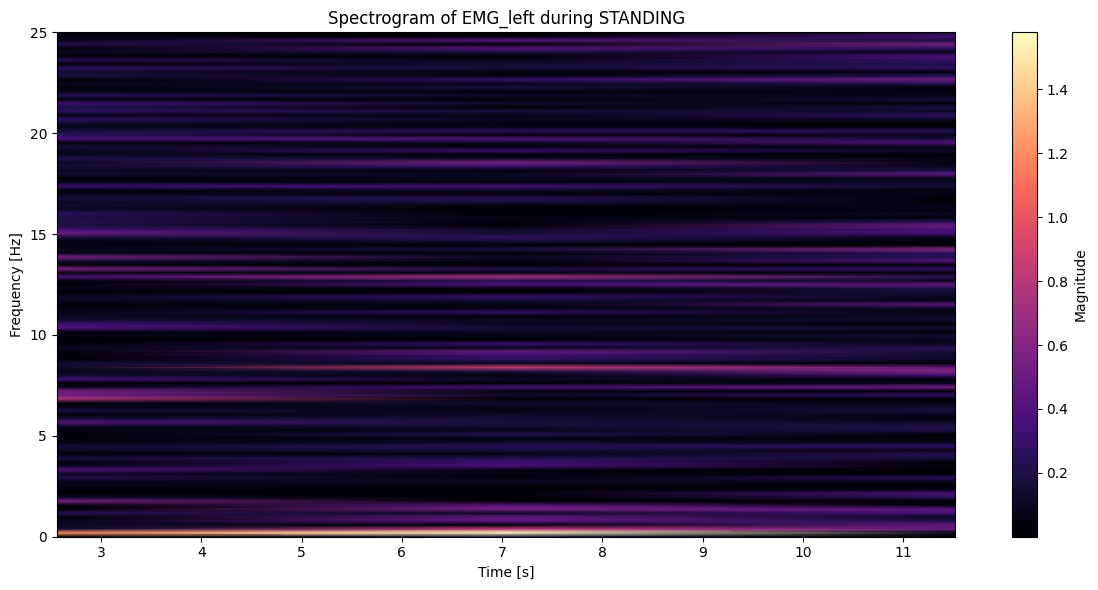

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import spectrogram

# --- Load dataset ---
df = pd.read_csv(r"H:\Chrome_downloads\HuGaDB_v2_various_01_00.csv")

# --- PREVIEW available values ---
print("Available activities:", df['activity'].unique())
print("Available sensors:", df.columns.drop(['Unnamed: 0', 'activity']).tolist())

# --- Set your desired activity and sensor here ---
activity = 'standing'   # Change this to 'standing', 'sitting', etc.
sensor_name = 'EMG_left'    # Change to any valid sensor

# --- Filter rows by activity ---
if activity not in df['activity'].unique():
    raise ValueError(f"'{activity}' is not in the dataset.")

if sensor_name not in df.columns:
    raise ValueError(f"'{sensor_name}' is not a valid sensor name.")

activity_df = df[df['activity'] == activity]
signal = activity_df[sensor_name].values

# --- Spectrogram computation ---
fs = 50  # Sampling frequency
f, t, Sxx = spectrogram(signal, fs=fs)

# --- Plot the spectrogram ---
plt.figure(figsize=(12, 6))
plt.pcolormesh(t, f, Sxx, shading='gouraud', cmap='magma')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [s]')
plt.title(f"Spectrogram of {sensor_name} during {activity.upper()}")
plt.colorbar(label='Magnitude')
plt.tight_layout()
plt.show()


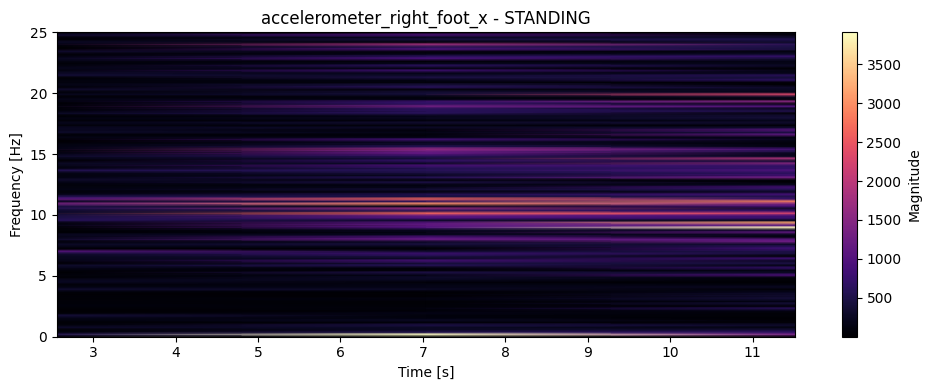

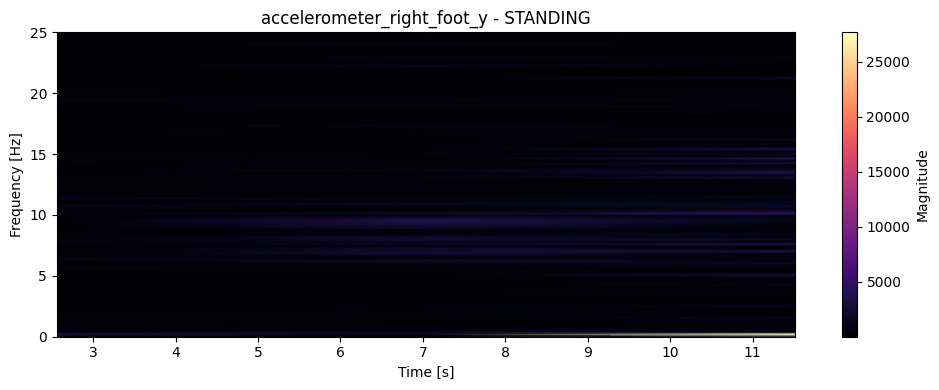

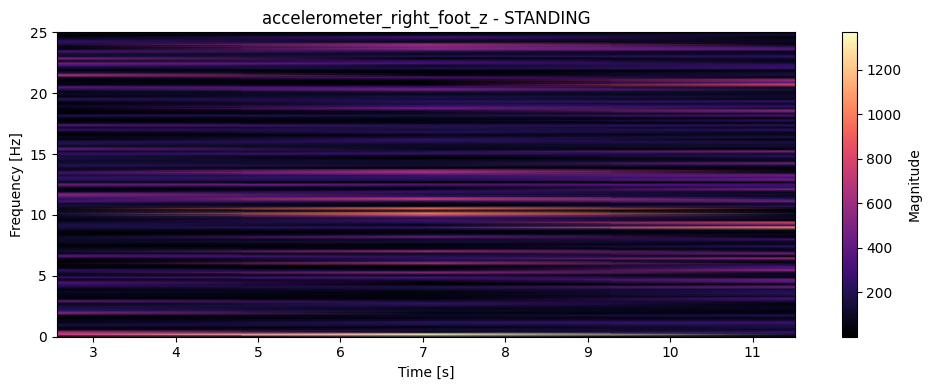

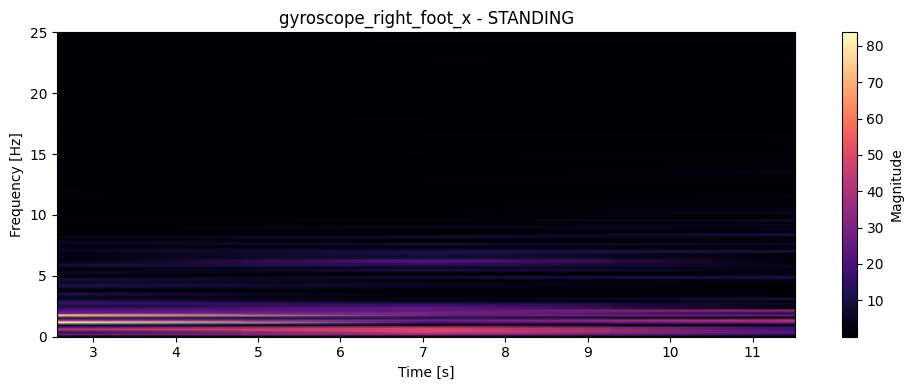

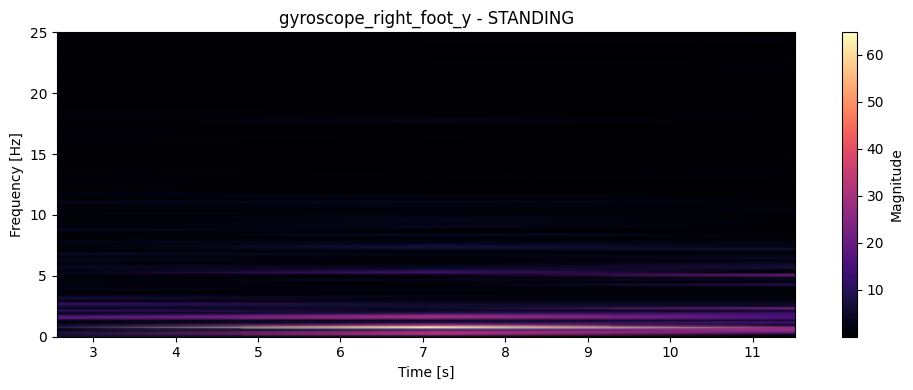

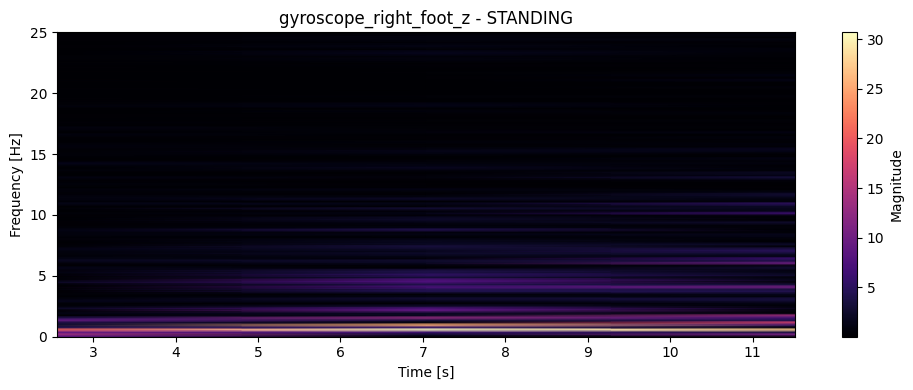

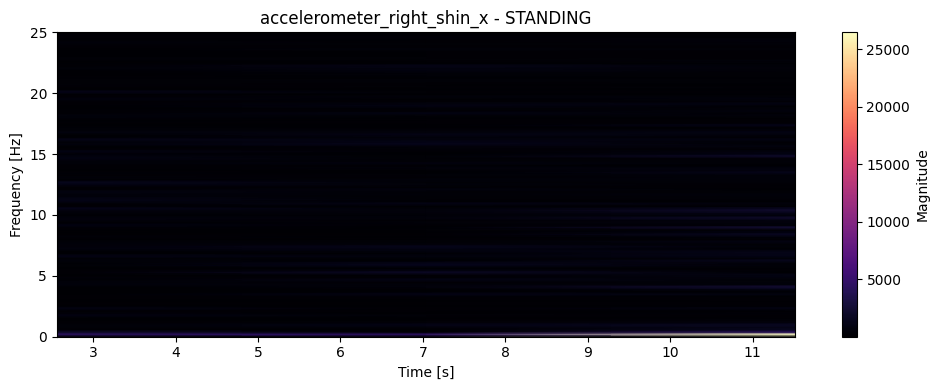

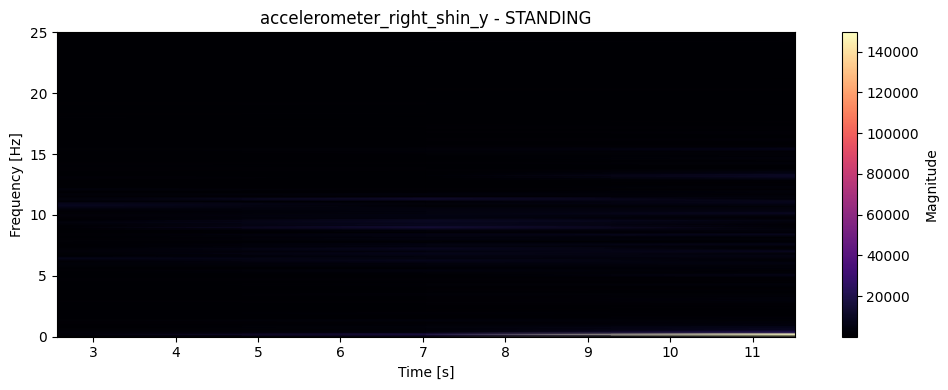

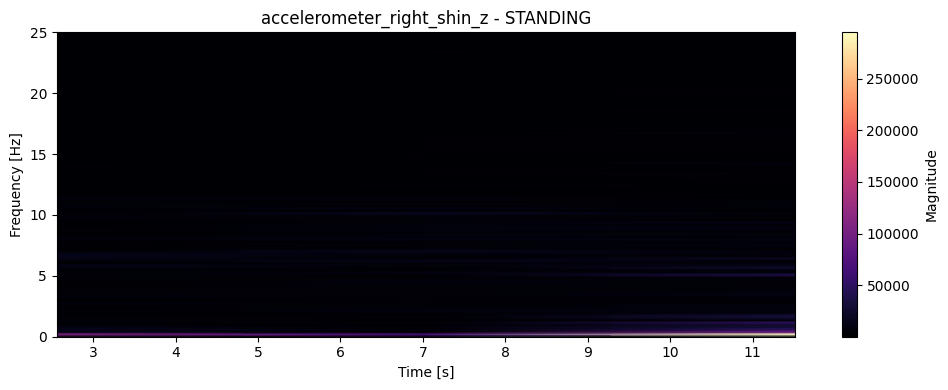

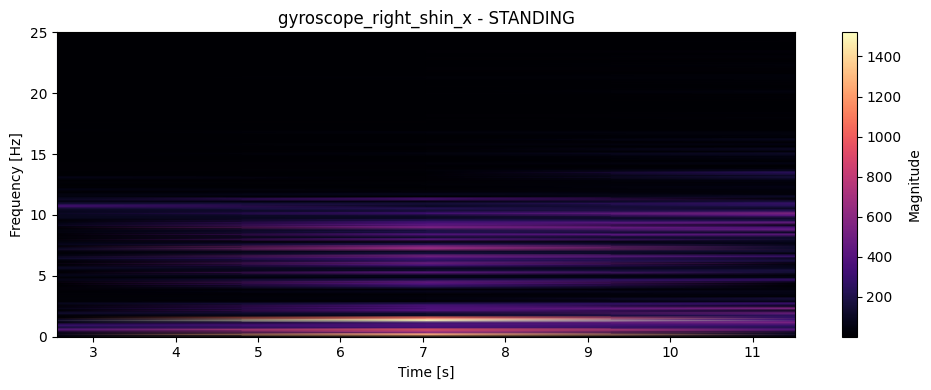

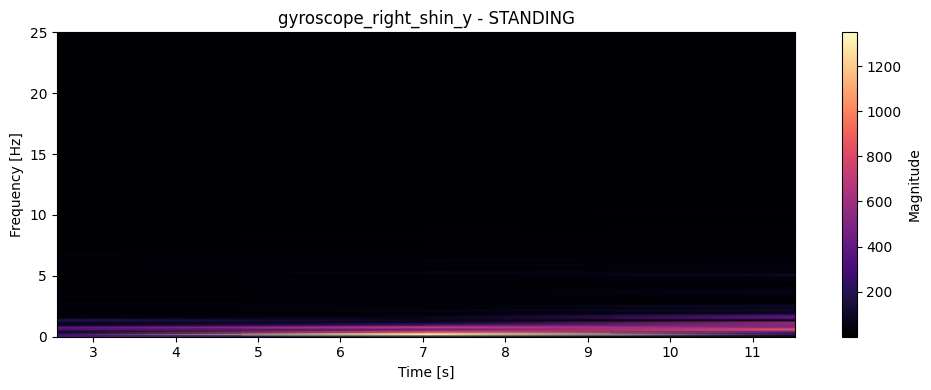

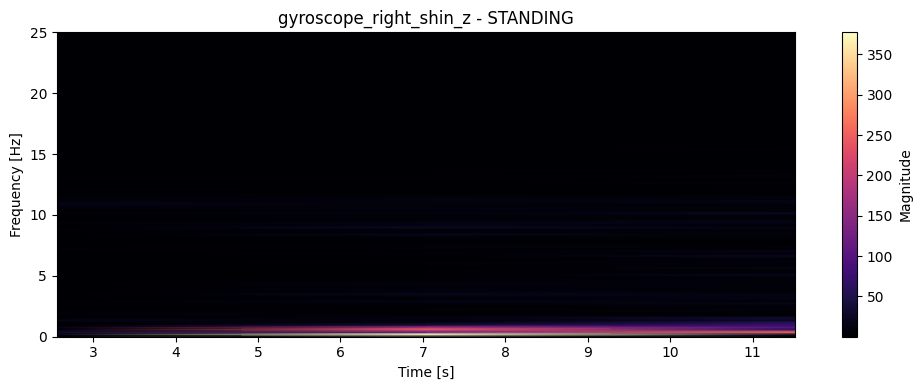

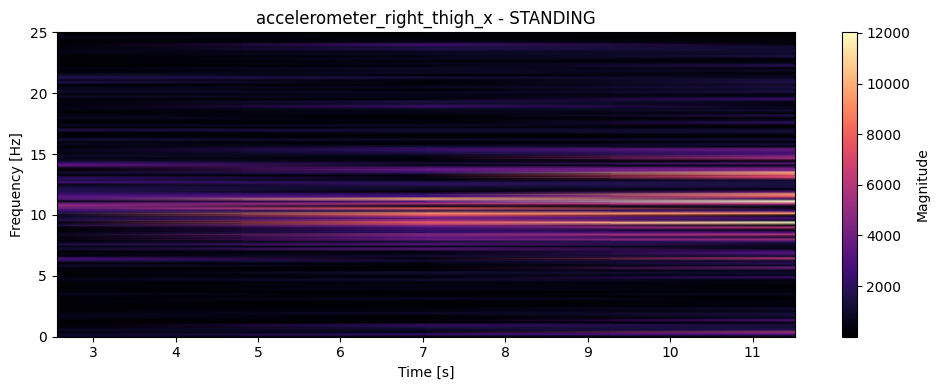

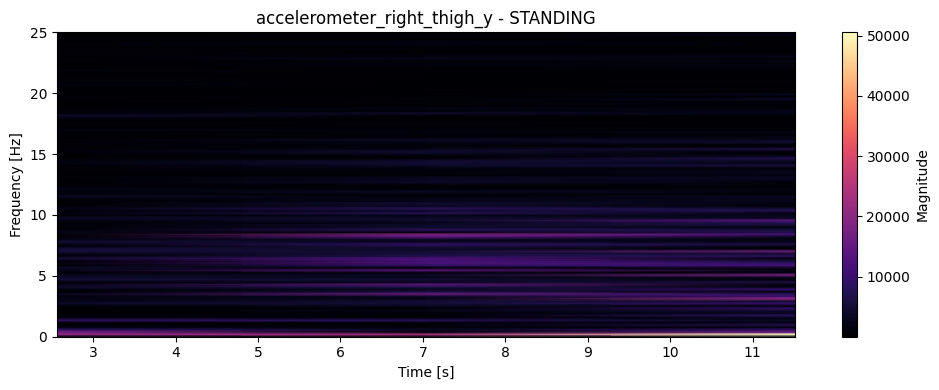

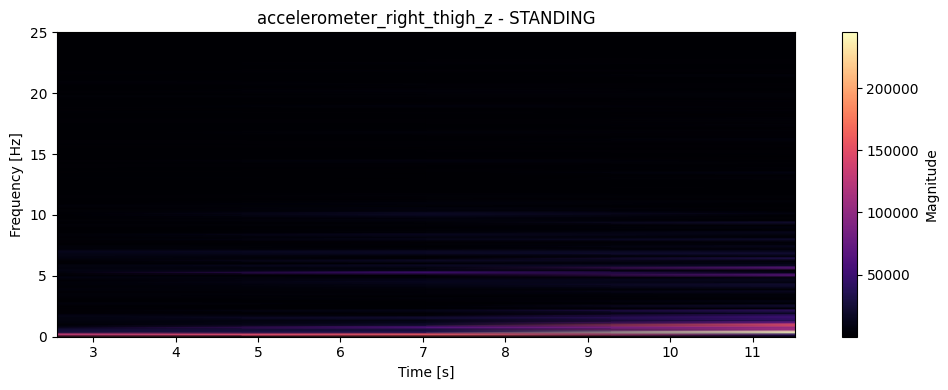

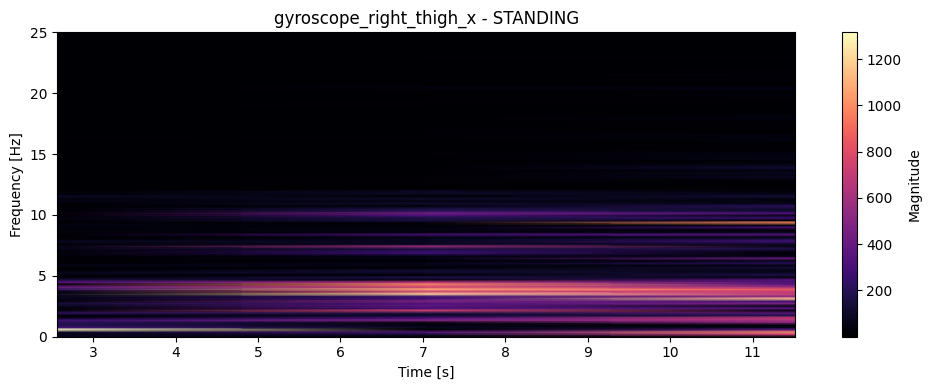

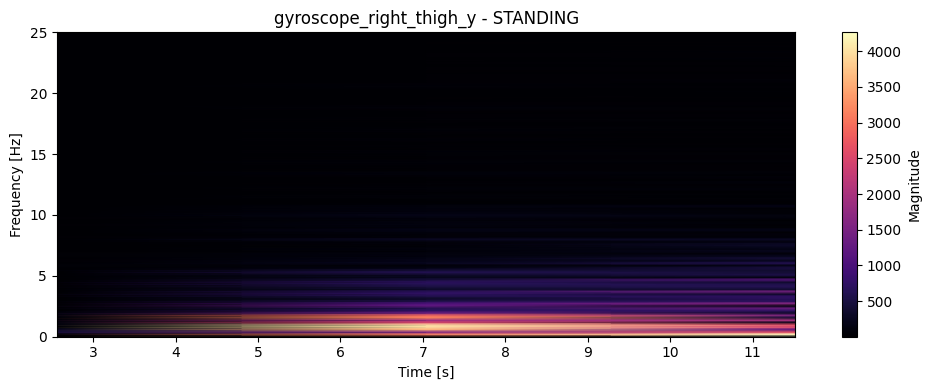

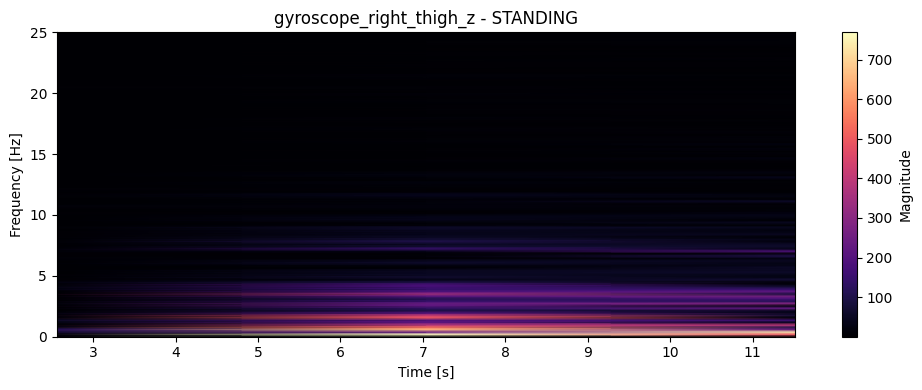

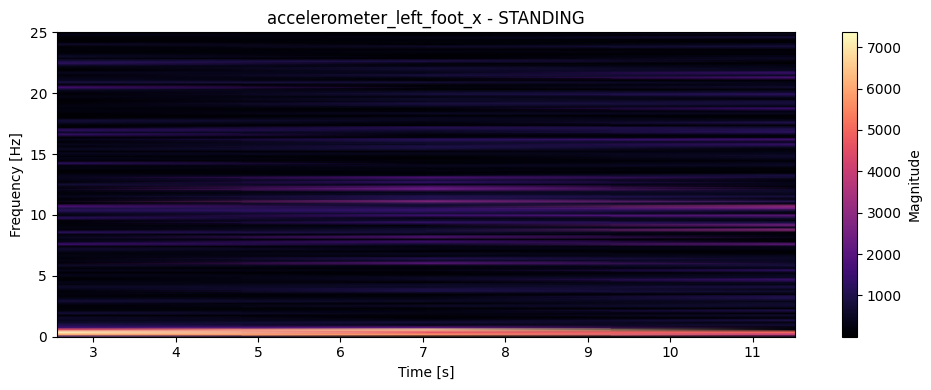

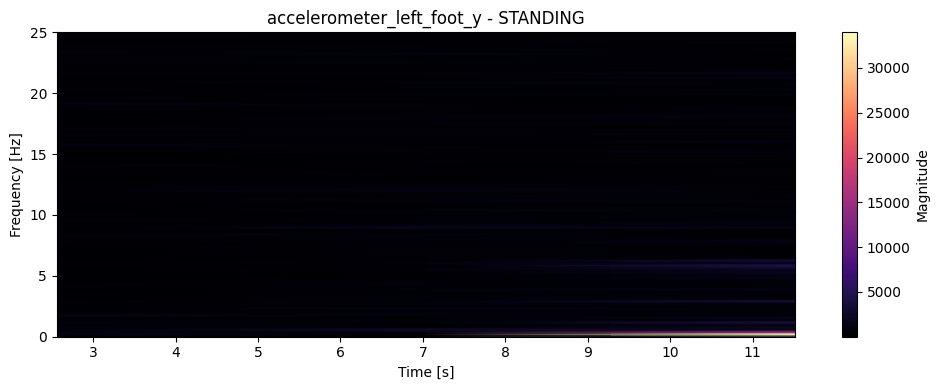

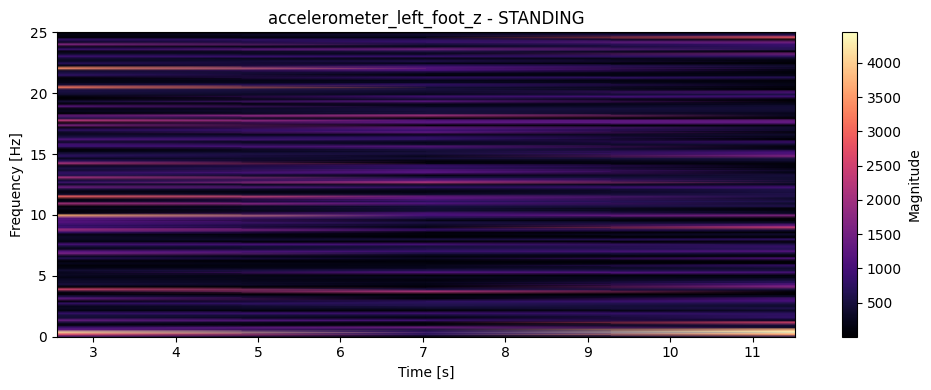

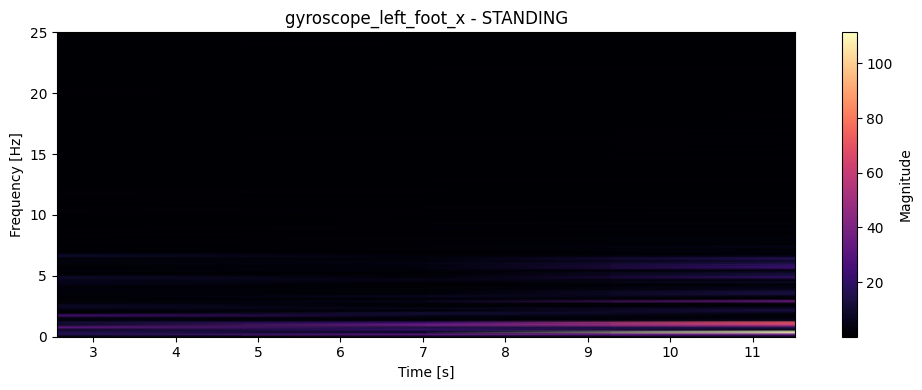

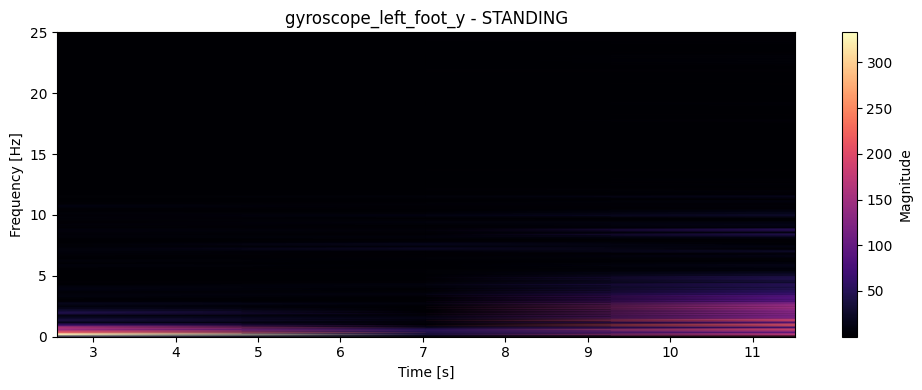

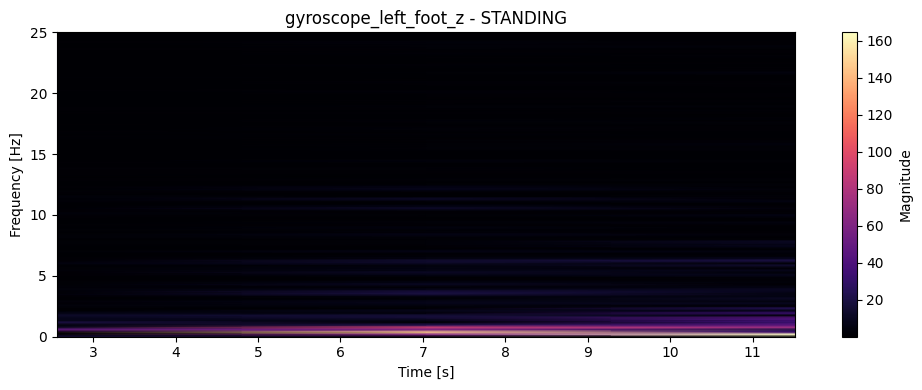

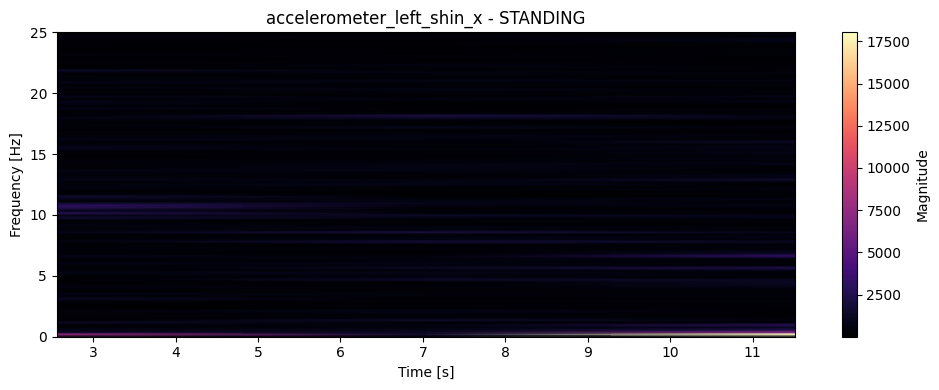

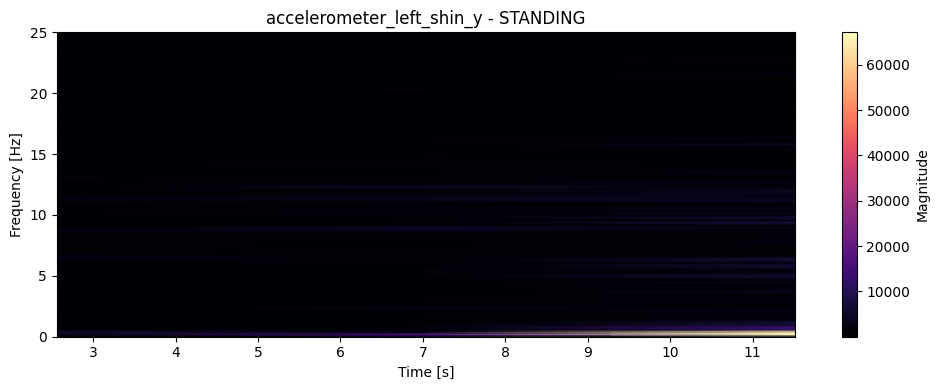

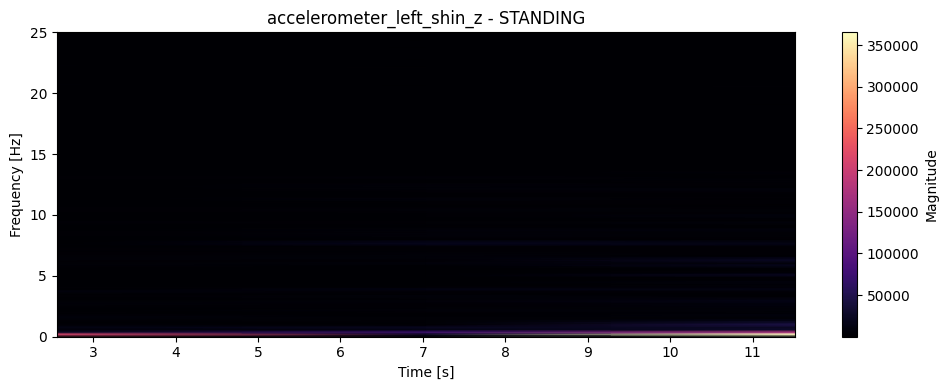

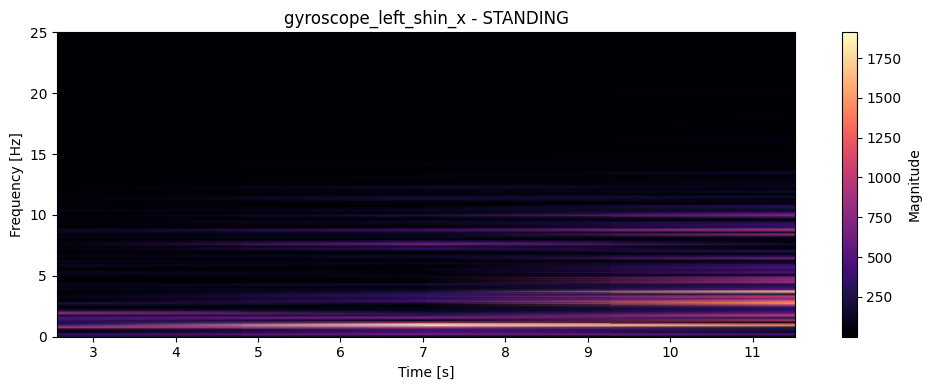

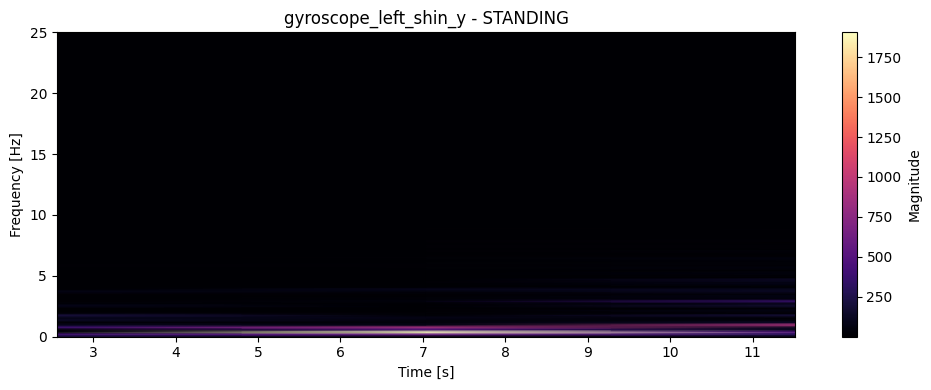

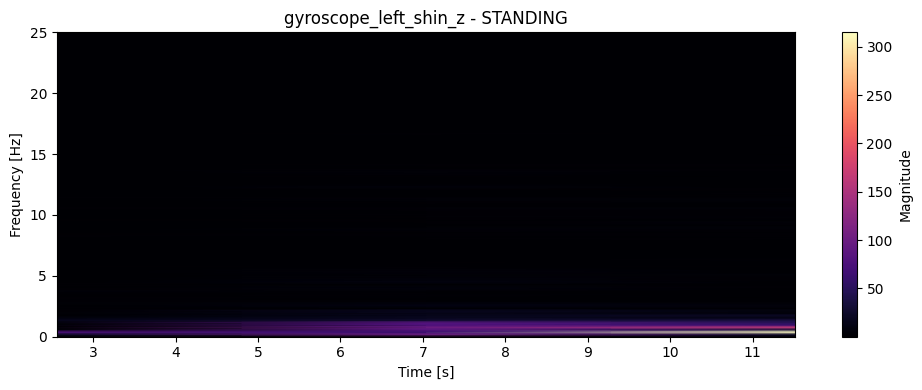

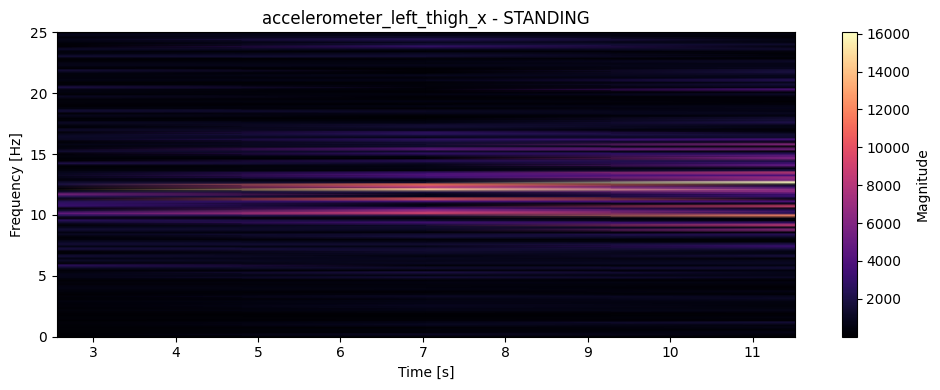

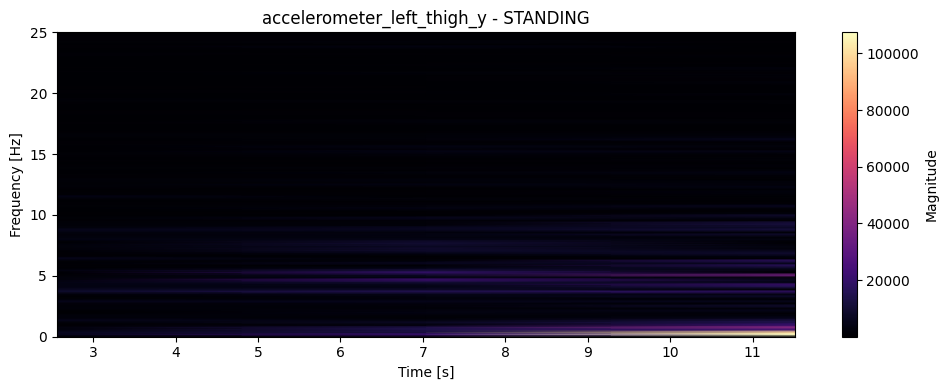

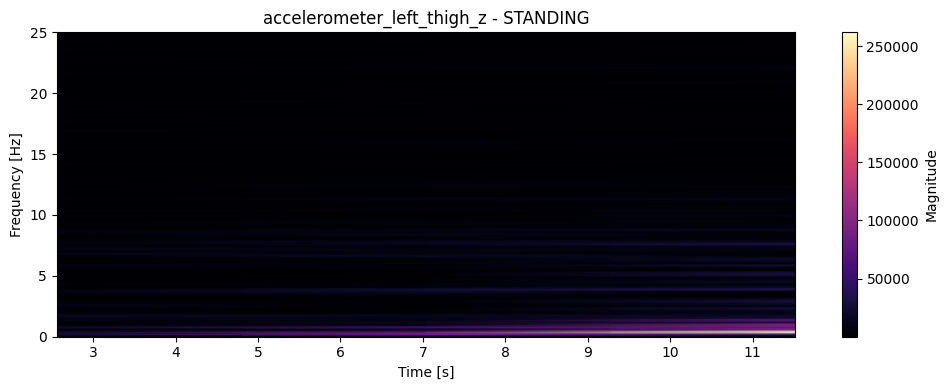

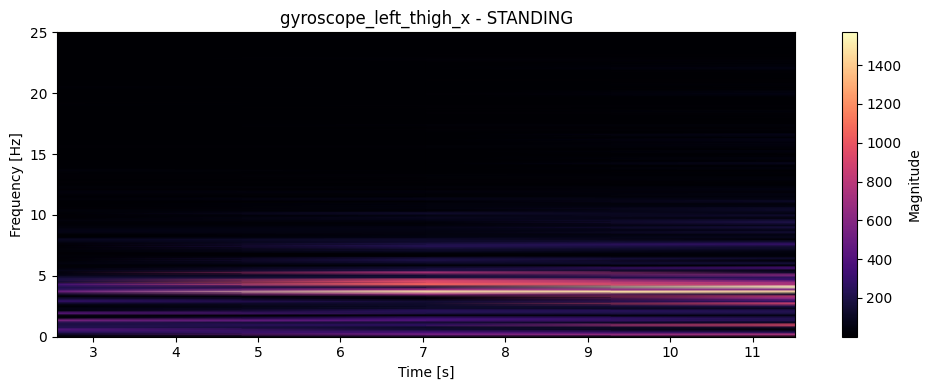

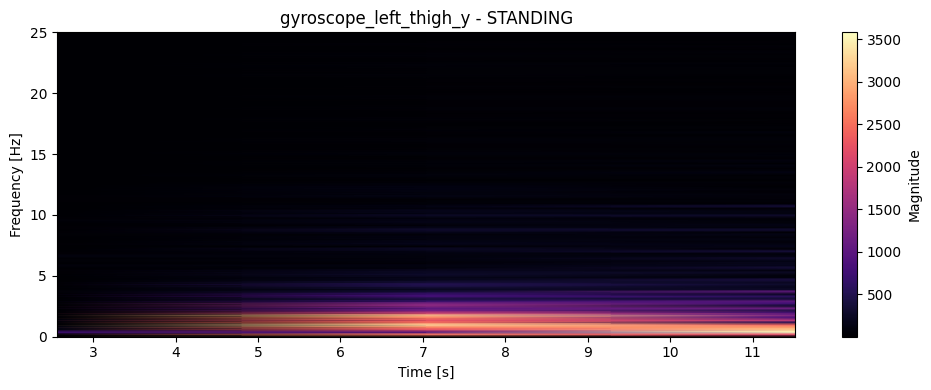

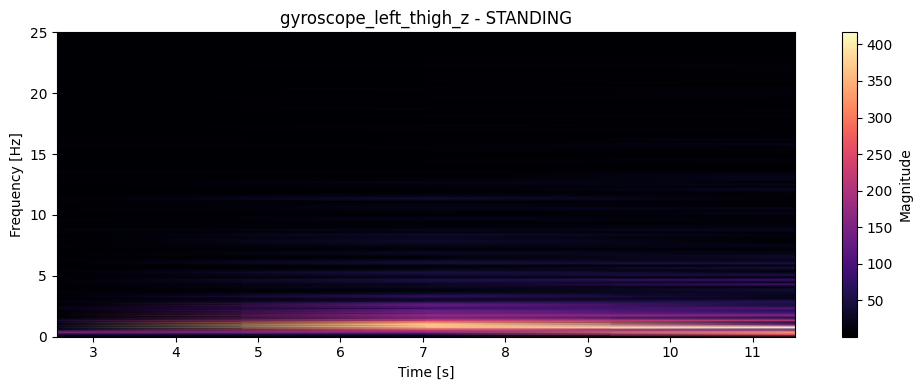

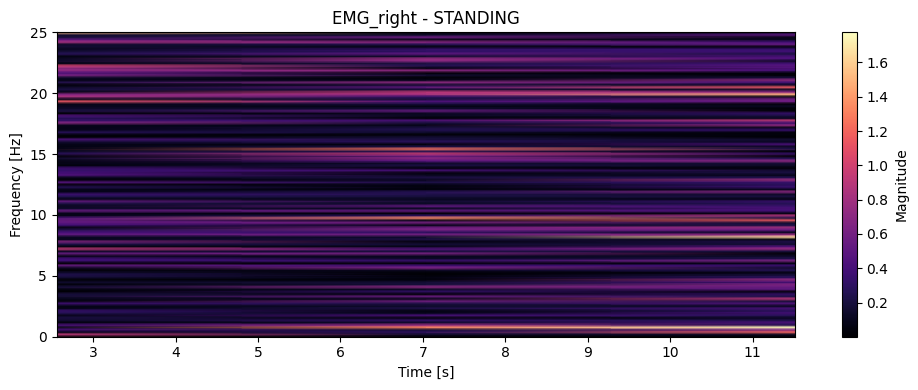

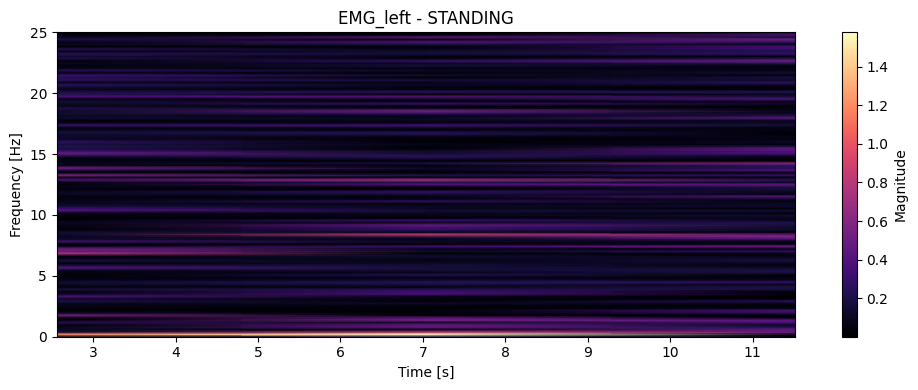

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import spectrogram

# --- Load dataset ---
df = pd.read_csv(r"H:\Chrome_downloads\HuGaDB_v2_various_01_00.csv")

# --- Set the activity you want to visualize ---
activity = 'standing'  # ← Change to 'standing', 'walking', etc.

# --- Filter dataset by activity ---
activity_df = df[df['activity'] == activity]

# --- Get list of sensor columns (excluding non-sensor ones) ---
sensor_cols = [col for col in df.columns if col not in ['Unnamed: 0', 'activity']]

# --- Sampling frequency ---
fs = 50

# --- Loop through all sensors and generate spectrograms ---
for sensor_name in sensor_cols:
    signal = activity_df[sensor_name].values
    
    # Compute spectrogram
    f, t, Sxx = spectrogram(signal, fs=fs)
    
    # Plot
    plt.figure(figsize=(10, 4))
    plt.pcolormesh(t, f, Sxx, shading='gouraud', cmap='magma')
    plt.ylabel('Frequency [Hz]')
    plt.xlabel('Time [s]')
    plt.title(f"{sensor_name} - {activity.upper()}")
    plt.colorbar(label='Magnitude')
    plt.tight_layout()
    plt.show()


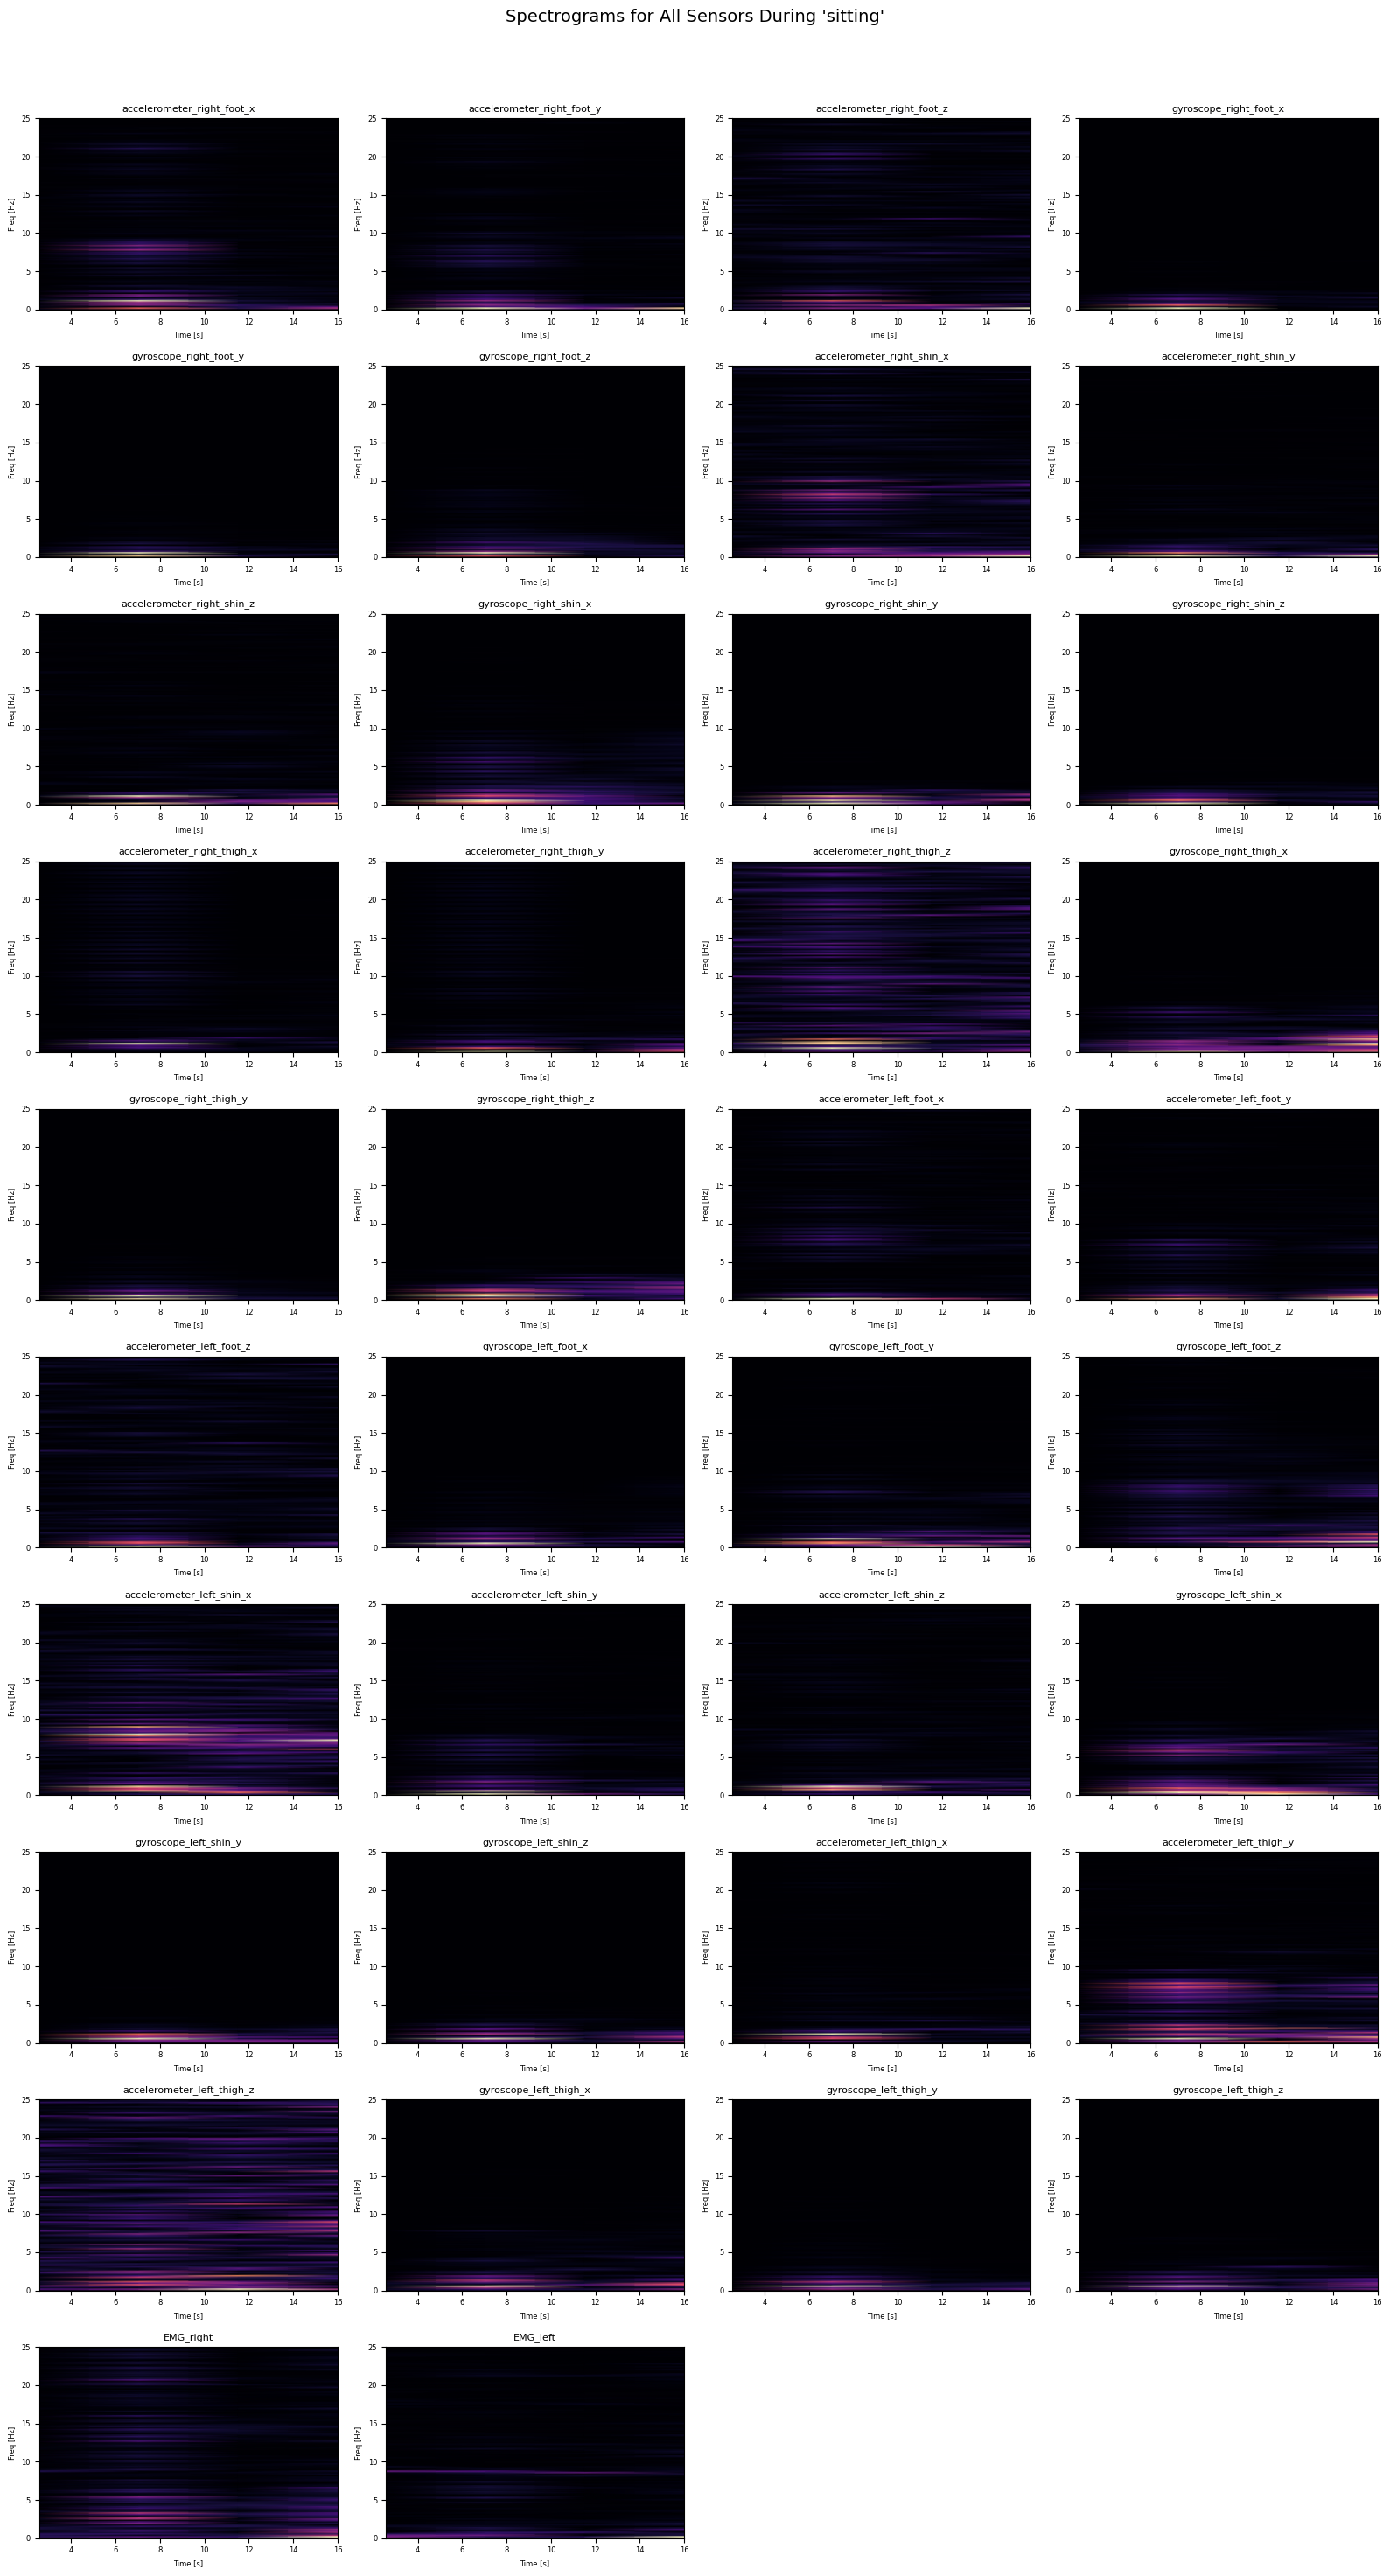

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import spectrogram
import math

# --- Load dataset ---
df = pd.read_csv(r"H:\Chrome_downloads\HuGaDB_v2_various_01_00.csv")

# --- Set target activity ---
activity = 'sitting'  # Change as needed

# --- Filter rows for that activity ---
activity_df = df[df['activity'] == activity]

# --- Sensor columns only ---
sensor_cols = [col for col in df.columns if col not in ['Unnamed: 0', 'activity']]

# --- Sampling frequency ---
fs = 50

# --- Prepare subplots ---
num_sensors = len(sensor_cols)
cols = 4  # Number of plots per row
rows = math.ceil(num_sensors / cols)

fig, axs = plt.subplots(rows, cols, figsize=(cols * 4, rows * 3))
axs = axs.flatten()

# --- Plot spectrogram for each sensor ---
for i, sensor_name in enumerate(sensor_cols):
    signal = activity_df[sensor_name].values
    f, t, Sxx = spectrogram(signal, fs=fs)
    
    axs[i].pcolormesh(t, f, Sxx, shading='gouraud', cmap='magma')
    axs[i].set_title(sensor_name, fontsize=8)
    axs[i].set_xlabel('Time [s]', fontsize=6)
    axs[i].set_ylabel('Freq [Hz]', fontsize=6)
    axs[i].tick_params(axis='both', labelsize=6)

# Hide any extra subplots
for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

# --- Final layout ---
plt.suptitle(f"Spectrograms for All Sensors During '{activity}'", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


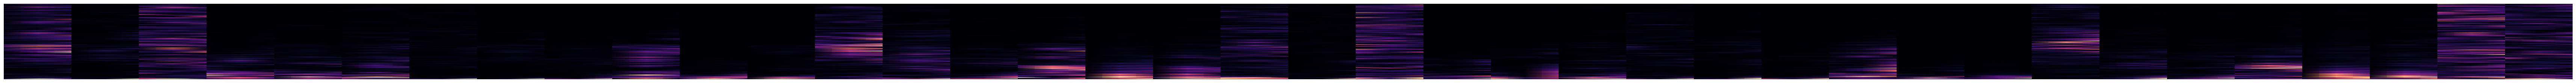

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import spectrogram

# --- Load dataset ---
df = pd.read_csv(r"H:\Chrome_downloads\HuGaDB_v2_various_01_00.csv")

# --- Set activity to visualize ---
activity = 'standing'  # Change as needed

# --- Filter for activity ---
activity_df = df[df['activity'] == activity]

# --- Sensor columns only ---
sensor_cols = [col for col in df.columns if col not in ['Unnamed: 0', 'activity']]

# --- Sampling rate ---
fs = 500  # Hz

# --- Setup: 1 row of subplots, no gaps ---
num_sensors = len(sensor_cols)
fig, axs = plt.subplots(1, num_sensors, figsize=(num_sensors * 1.8, 2), squeeze=False)

# --- Plot spectrograms tightly ---
for i, sensor_name in enumerate(sensor_cols):
    signal = activity_df[sensor_name].values
    f, t, Sxx = spectrogram(signal, fs=fs)

    ax = axs[0, i]
    ax.pcolormesh(t, f, Sxx, shading='gouraud', cmap='magma')
    ax.axis('off')  # Remove all axes

# --- Remove all padding ---
plt.subplots_adjust(left=0, right=1, top=1, bottom=0, wspace=0, hspace=0)
plt.show()


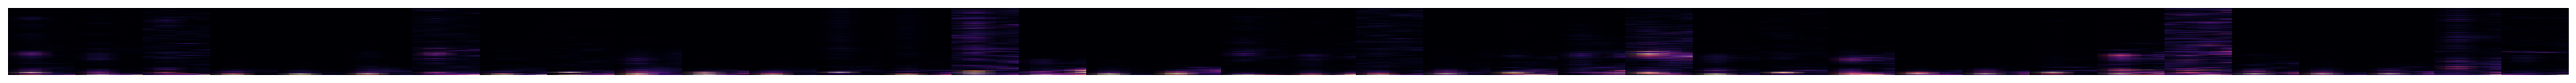

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import spectrogram

# --- Load dataset ---
df = pd.read_csv(r"H:\Chrome_downloads\HuGaDB_v2_various_01_00.csv")

# --- Target activity ---
activity = 'sitting'  # Change as needed
fs = 50  # Sampling rate (Hz)

# --- Filter by activity ---
activity_df = df[df['activity'] == activity]

# --- Sensor columns only ---
sensor_cols = [col for col in df.columns if col not in ['Unnamed: 0', 'activity']]
num_sensors = len(sensor_cols)

# --- Setup figure size: 84x84 pixels per subplot @ 100 DPI ---
figsize_inches = (num_sensors * 0.84, 0.84)
fig, axs = plt.subplots(1, num_sensors, figsize=figsize_inches, dpi=100)

# --- Plot each spectrogram without any labels or borders ---
for i, sensor_name in enumerate(sensor_cols):
    signal = activity_df[sensor_name].values
    f, t, Sxx = spectrogram(signal, fs=fs)
    
    ax = axs[i]
    ax.pcolormesh(t, f, Sxx, shading='gouraud', cmap='magma')
    ax.axis('off')

# --- Remove all padding and spacing ---
plt.subplots_adjust(left=0, right=1, top=1, bottom=0, wspace=0, hspace=0)
plt.show()


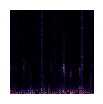

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import spectrogram

# --- Load dataset ---
df = pd.read_csv(r"H:\Chrome_downloads\HuGaDB_v2_various_01_00.csv")

# --- Set activity ---
activity = 'sitting'
fs = 50  # Sampling rate

# --- Filter rows ---
activity_df = df[df['activity'] == activity]

# --- Sensor columns ---
sensor_cols = [col for col in df.columns if col not in ['Unnamed: 0', 'activity']]
num_sensors = len(sensor_cols)

# --- Create figure: 84x84 pixels total at 100 DPI → 0.84 x 0.84 inches ---
fig, axs = plt.subplots(1, num_sensors, figsize=(0.84, 0.84), dpi=100)

# Ensure axs is iterable
if num_sensors == 1:
    axs = [axs]

# --- Plot each sensor spectrogram ---
for i, sensor_name in enumerate(sensor_cols):
    signal = activity_df[sensor_name].values
    f, t, Sxx = spectrogram(signal, fs=fs)

    ax = axs[i]
    ax.pcolormesh(t, f, Sxx, shading='gouraud', cmap='magma')
    ax.axis('off')

# --- Remove all spacing ---
plt.subplots_adjust(left=0, right=1, top=1, bottom=0, wspace=0, hspace=0)

# --- Save or display ---
plt.show()
# plt.savefig("final_output_84x84.png", dpi=100, bbox_inches='tight', pad_inches=0)
